# Tworzenie animacji przewodnictwa cieplnego
### Autorzy: Bartosz Rydziński, Mateusz Anikiej, Aleksander Obuchowski
### Projekt na Obliczenia Symboliczne
* Format .ipynb został zastosowany dla wygody opisu i może nie wyświetlać prawidłowo animacji, załączamy również plik .py.

## Wczytywanie bibliotek języka Python.

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Funkcja Gaussa
$min$ - początek przedziału, 
$max$ - ostatni element, 
$step$ - krok

In [2]:
def generate_gauss(min, max, step):
    x0 = int((min+max)/2)

    ran = int(((max - min) / step))
	#obliczanie ilości kroków
    steps = [min + step*i for i in range(1, ran+1)]
	#tworzenie listy steps, gdzie dla ilości kroków przechowujemy dany krok jako minimum + (numer_iteracji) * krok
	
    inp = []
    for x in steps:
        inp.append(math.exp(-1 * ((x - x0) * (x - x0))))
	 #zwracamy obliczone wartości oraz dla wygody podany krok
    return inp, step

Dla każdego elementu tablicy steps obliczamy wartość funkcji Gaussa jako: $e^{- (x - x_0)^2}$ \\
Gdzie $x$ - dany krok, $x_0$ - środek przedziału.

## Funkcja przewodnictwa cieplnego
$U_t = a * U_{xx}$ \\
$u_i$ - lista elementów generowanych funkcją Gaussa (elementy początkowe) \\
$a$ - współczynnik przewodnictwa, $tau (\tau)$ - krok czasowy, $h$ - krok

In [3]:
def thermal_conductivity(ui, a, tau, h):
    denom = (1/(tau / 2)) + (2 / (h * h))
	  #denom - dzielnik używany w funkcji (*d*)

    res = [[i] for i in ui]
    #tworzenie listy zawierającej jednoelementowe listy, będące kolejnymi elementami ui
    
    for j in range(1, len(ui) * 5):
        for i in range(len(res)):
          #dwie pętle przechodzące odpowiednio po indeksach i oraz j.
          
            if i == 0:
              #dla pierwszego elementu bierzemy 0 w miejscu res[i-1][j-1] (*)
                uj = ((res[i][j-1] / (tau / 2) ) + ((res[i+1][j-1]) / (h * h))) / denom

            if i == len(res) - 1:
              # dla ostatniego elementu bierzemy 0 w miejscu res[i+1][j-1] (**)
                uj = ((res[i][j-1] / (tau / 2) ) + ((res[i-1][j-1]) / (h*h))) / denom

            else:
              # w każdym innym przypadku stosujemy pełną funkcję (***)
                uj = ((res[i][j-1] / (tau / 2) ) + ((res[i+1][j-1] + res[i-1][j-1]) / (h * h))) / denom

            res[i].append(uj)       
            #wszystkie elementy przechowujemy w liście res
        

    uji = []
    for i in res:
        uji.append(a * i[-1])
        #każdy element listy res mnożymy przez współczynnik a i zapisujemy w liście uji
    t = [tau * i for i in range(len(uji))]
    #tworzymy listę kroków czasowych (tau * i)
    #zwracamy listy uji oraz t
    return uji, t

$(*d*) \quad denom = \frac{1}{\frac{tau}{2}} + \frac{2}{h^2}$ \\
$(*) \quad U_j = \left( \frac{res_i^{j-1}}{\frac{tau}{2}} + \frac{res_{i+1}^{j-1}}{h^2} \right) * \frac{1}{denom}$ \\
$(**) \quad U_j = \left( \frac{res_i^{j-1}}{\frac{tau}{2}} + \frac{res_{i-1}^{j-1}}{h^2} \right) * \frac{1}{denom}$ \\
$(***) \quad U_j = \left( \frac{res_i^{j-1}}{\frac{tau}{2}} + \frac{res_{i+1}^{j-1} + res_{i-1}^{j+1}}{h^2} \right) * \frac{1}{denom}$

## Generowanie wartości początkowych

In [4]:
x = []
for i in range(1, 31):
    x.append(generate_gauss(0, 10, .5 / i))
#tworzymy listę list zawierających wartości funkcji Gaussa dla kroków (*)
x.reverse()
#odwracamy listę, aby otrzymać odpowiednią kolejność wyrazów przy animacji

$(*)$ \\
Pierwszy krok: $ \frac{0.5}{1} = 0.5$ \\
Drugi krok: $ \frac{0.5}{2} = 0.25$ \\
$...$ \\
Ostatni krok: $\frac{0.5}{30} \approx 0.0167$ 

## Funkcja animacji
$i$ - indeks \\
Funkcja nie zwraca żadnych wartości, polega na metodach matplotlib.animation.

In [5]:
def animate(i):
    y = thermal_conductivity(x[ i % len(x) ][0], 1.7, x[ i % len(x) ][1], .01)
    #stosujemy funkcję przewodnictwa cieplnego po kolei dla elementów listy x,
    # operacja modulo % w indeksie została zastosowana, aby uniknąc błędów
    #  i spowodować zapętlenie animacji.
    
    ax1.clear()
    # przy każdym kroku oczyszczamy oś z poprzedniego wykresu
    
    ax1.plot( y[1], y[0] )
    # rysowanie na wykresie wartości y[1] (lista uji z funkcji przewodnictwa cieplnego)
    # oraz y[0] (lista kroków czasowych)
    
    plt.axis([0, 10, 0, 1])
    plt.xlabel("X")
    plt.ylabel("Temperatura")
    plt.title("Rozchodzenie się ciepła")

## Tworzenie animacji

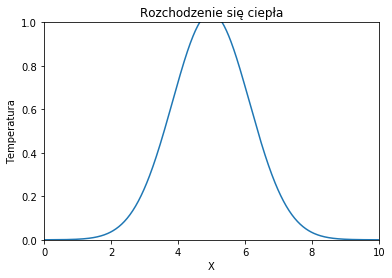

In [6]:
fig = plt.figure()
# inicjalizowanie figury
ax1 = fig.add_subplot(1,1,1)
# dodawanie subplotu z 1 kolumną, 1 rzędem i o indeksie 1

ani = animation.FuncAnimation(fig, animate, interval = 800)
# wywołanie funkcji animacji
plt.show()
# wywołanie animacji na ekran